<a href="https://colab.research.google.com/github/take2rohit/yolov4/blob/master/yolo_label_visualize_preporcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset 
This notebook has been designed for fastest training for yoloV4 with least amount of changes required to done.

Changes that is to be done has been already written as `Change 1`, `Change 2`, etc.

1. Download dataset from OpenImage V4 using [OIDv4 toolkit](https://github.com/EscVM/OIDv4_ToolKit)
2. Mount your drive

*This code has been compiled by*
1. *Arihant Gaur - [website](https://flagarihant2000.github.io/arihantgaur/)*
2. *Rohit Lal - [website](http://take2rohit.github.io/)*

> **Change 1:** Change the path of zip file of dataset. The dataset consists of 1 folder `train` which consists folder of images as well as label


In [ ]:
%cd /content/
!unzip /content/drive/My\ Drive/number_plate/number_plate_yolo_openimage.zip

In [ ]:
import cv2,os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

> **Change 2:** Change the variables `img_dir` and `label_dir`


## Visualise sample data

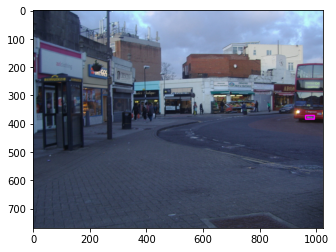

In [ ]:
img_dir = '/content/train/Vehicle registration plate'
label_dir = '/content/train/Label'
files = list(os.listdir(img_dir))

idx = np.random.randint(1,1000)
filename = files[idx]

rand_img_path = os.path.join(img_dir,filename)
abs_label_dir = os.path.join(label_dir,filename[:-3]+'txt')

img = cv2.imread(rand_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with open(abs_label_dir, "r") as f:
    label = f.read()

label = label.strip().split()

x_top,y_top = int(float(label[3])),int(float(label[4]))
x_bottom,y_bottom = int(float(label[5])),int(float(label[6]))

img = cv2.rectangle(img,(x_top,y_top),(x_bottom,y_bottom),[255,0,255], 3)

plt.imshow(img)
plt.show()

img_h,img_w = img.shape[0], img.shape[1]

x_top_norm, y_top_norm  = x_top//img_w , y_top//img_h
x_bottom_norm, y_bottom_norm  = x_bottom//img_w , y_bottom//img_h

x_center_norm = (x_top_norm + x_bottom_norm) // 2
y_center_norm = (y_top_norm + y_bottom_norm) // 2

## Convert OpenImage Format to Yolo Format


Your yolo converted labels will be saved in an autogenerated folder named `yolo_labels`

In [ ]:
save_folder = '/content/train/yolo_labels'

if not os.path.exists(save_folder):
    os.mkdir(save_folder)

for filename in tqdm(os.listdir(img_dir), total=len(os.listdir(img_dir))):

    rand_img_path = os.path.join(img_dir,filename)
    abs_label_dir = os.path.join(label_dir,filename[:-3]+'txt')

    img = cv2.imread(rand_img_path)
    img_h,img_w = img.shape[0], img.shape[1]

    with open(abs_label_dir, "r") as f:
        label = f.read()

    label = label.strip().split()

    x_top,y_top = int(float(label[3])),int(float(label[4]))
    x_bottom,y_bottom = int(float(label[5])),int(float(label[6]))

    x_top_norm, y_top_norm  = x_top/img_w , y_top/img_h
    x_bottom_norm, y_bottom_norm  = x_bottom/img_w , y_bottom/img_h

    x_center_norm = (x_top_norm + x_bottom_norm) / 2
    y_center_norm = (y_top_norm + y_bottom_norm) / 2

    h = abs(x_top_norm-x_bottom_norm)  
    w = abs(y_top_norm-y_bottom_norm)

    with open(os.path.join(save_folder,filename[:-3]+'txt'), "w") as f:
        f.write(f'0 {x_center_norm} {y_center_norm} {w} {h}')

# Visualise a yolo text and sample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Just run the below code and it will show a random image and its label

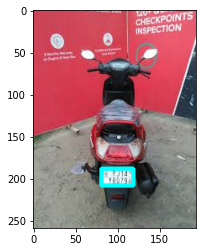

In [125]:
import random

def visualise_yolo_dataset(image_file,label_file):
    with open(label_file, "r") as f:
        label = f.read()

    img = cv2.imread(image_file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_h,img_w = img.shape[0], img.shape[1]

    labels = label.strip().split('\n')
    for label in labels:
        label= label.split()
        n_x,n_y = float(label[1]),float(label[2]) 
        n_w,n_h = float(label[3]),float(label[4]) 

        x_c,y_c = int(img_w*n_x) , int(img_h * n_y)
        w,h =  int(img_w*n_w) , int(img_h * n_h)

        x1,y1 = x_c-w//2 , y_c-h//2
        x2,y2 = x_c+w//2 , y_c+h//2

        img = cv2.rectangle(img, (x1,y1),(x2,y2),[0,255,255],3)
    return img

root = '/content/combined_all_sets_bike_plate'
dataset_folder_list = os.listdir(root)

image_file = os.path.join(root,random.choice(dataset_folder_list)[:-3]+'jpg')
label_file = image_file[:-3]+'txt'

img = visualise_yolo_dataset(image_file,label_file)
plt.imshow(img)

# Combine all sets to one single folder 

This section also handles in removing unlabelled data

Moral of the story:
- Dont tell juniors to zip the file otherwise they will not understand it!
- Tell them to upload in single drive folder only!

In [ ]:
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set1.zip'
!unrar e '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set2.rar' /content/set2/
!unrar e '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set3.rar' -d /content/set3/
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set4.zip'
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set5.zip' -d /content/set5/
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set6.zip' -d /content/set6/
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set7.zip'
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set8.zip'
!unzip '/content/drive/My Drive/projects/number_plate_detection/labelled_dataset_yolo_type/bike_extracted/Labelled Zip Files/set9.zip'

In [89]:
import os,shutil,cv2, numpy as np
import matplotlib.pyplot as plt

#create a new folder to save all files
save_folder = 'combined_all_sets_bike_plate'
if not os.path.exists(save_folder):
    os.mkdir(save_folder)

def rectify_labels(label_file,new_filename):
    with open(label_file, "r") as f:
        label = f.read()
    labels = label.strip().split('\n')
    with open(new_filename, "w") as f:
        for label in labels:
            label= label.split()
            label[0] = 0 
            f.write(f'0 {label[1]} {label[2]} {label[3]} {label[4]}\n')

In [91]:
set_name_list = ['set1','set2','set3','set4','set5','set6','set7','set8','set9']
for set_name in set_name_list:
    i,total=0,0
    for filename in os.listdir(set_name):
        total +=1
        if filename[-3:] == 'txt' and filename != 'classes.txt':
            i+=1
            rectify_labels(os.path.join(set_name,filename),
                           os.path.join(save_folder,filename))
            shutil.copy(os.path.join(set_name,filename[:-3]+'jpg'), save_folder)
    #     break
    # break
    print(f'total images and label in {set_name}: {i*2} out of {total}')      

print(f'Total (image + labels): {len(os.listdir(save_folder))}')

total images and label in setset1: 148 out of 150
total images and label in setset2: 176 out of 189
total images and label in setset3: 118 out of 160
total images and label in setset4: 152 out of 178
total images and label in setset5: 184 out of 193
total images and label in setset6: 170 out of 186
total images and label in setset7: 178 out of 190
total images and label in setset8: 190 out of 192
total images and label in setset9: 150 out of 151
Total : and labels: 1466
